In [1]:
from abel import SourceBasic, InterstageImpactX, Linac, Beam
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

/users/lindstrm/.abelconfig.toml
Loading ABEL config from '/users/lindstrm/.abelconfig.toml'
CONFIG.bind_path = "/pfs/lustrep4/scratch/project_465001375"
CONFIG.cluster_name = "lumi"
CONFIG.default_cmap = <matplotlib.colors.ListedColormap object at 0x7f0e7d36ee10>
CONFIG.elegant_exec = "singularity exec --bind /pfs/lustrep4/scratch/project_465001375:/pfs/lustrep4/scratch/project_465001375 /project/project_465001375/software/elegantelegant.sif "
CONFIG.elegant_path = "/project/project_465001375/software/elegant"
CONFIG.elegant_rpnflag = ""
CONFIG.elegant_use_container = True
CONFIG.guineapig_path = "/project/project_465001375/software/guinea-pig/bin"
CONFIG.hipace_binary = "/project/project_465001375/software/hipace/build/bin/hipace"
CONFIG.hipace_path = "/project/project_465001375/software/hipace"
CONFIG.partition_name_small = "small-g"
CONFIG.partition_name_standard = "standard-g"
CONFIG.plot_fullwidth_default = 18
CONFIG.plot_width_default = 8
CONFIG.project_name = "project_465001379

## Setup

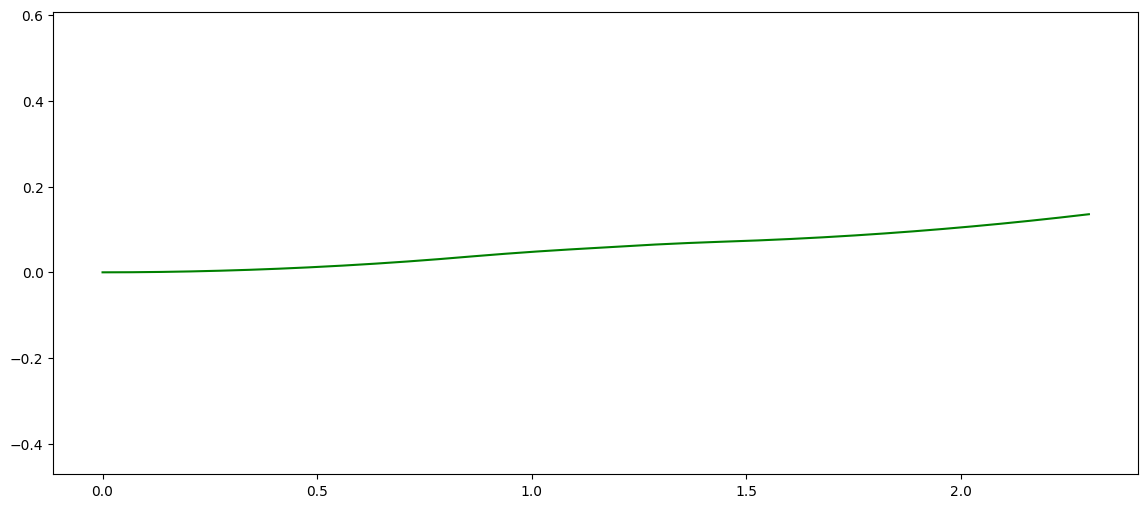

In [34]:
from abel.utilities.plasma_physics import beta_matched
n0 = 1e22;

source = SourceBasic()
source.energy = 3e9
source.charge = -0.1e-9
source.emit_nx = 10e-6
source.emit_ny = 1e-6
source.beta_x = beta_matched(n0, source.energy)
source.beta_y = source.beta_x
source.bunch_length = 30e-9
source.rel_energy_spread = 2e-2
source.num_particles = 40000

interstage = InterstageImpactX()
interstage.nom_energy = source.energy
interstage.dipole_length = 1.0*np.sqrt(source.energy/10e9)
interstage.dipole_field = 1.0
interstage.L2_by_L1 = 1.103
interstage.B2_by_B1 = 1#np.sqrt(2)
interstage.enable_nonlinearity = True
interstage.enable_chicane = True
interstage.enable_sextupole = True
interstage.enable_csr = False
interstage.enable_isr = False
interstage.plot_layout()

In [35]:
linac = Linac(source=source)
linac.trackables = [source, interstage]
linac.run('test_interstage2', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   3.0 GeV, Q = -0.10 nC, σz =   0.0 µm, σE =  2.0%, ε =  10.0/1.0 mm-mrad
    ... #1  InterstageImpactX       (s =    1.7 m) :   E =   3.0 GeV, Q = -0.10 nC, σz =   0.4 µm, σE =  2.0%, ε =  10.9/1.2 mm-mrad


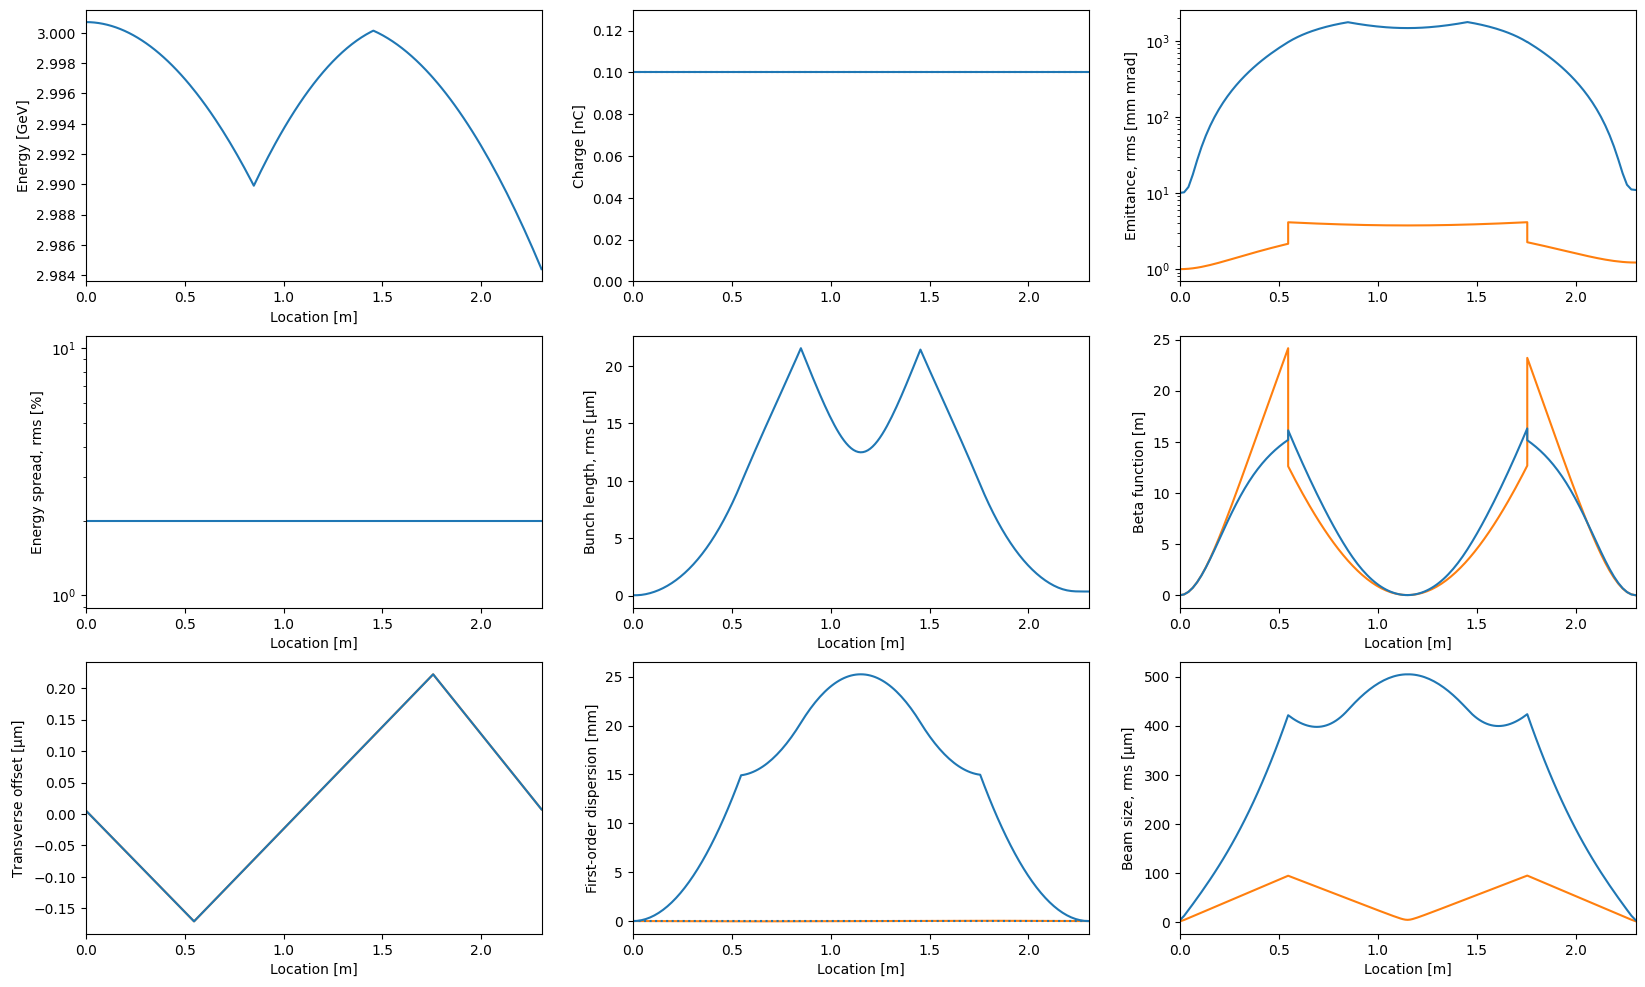

SyntaxError: 'return' outside function (997041214.py, line 6)

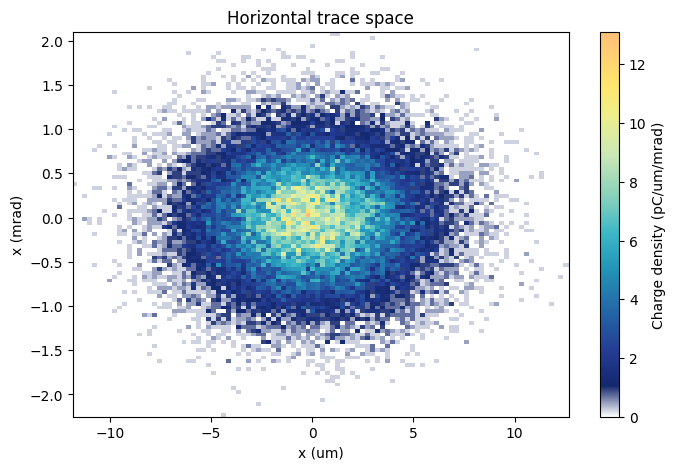

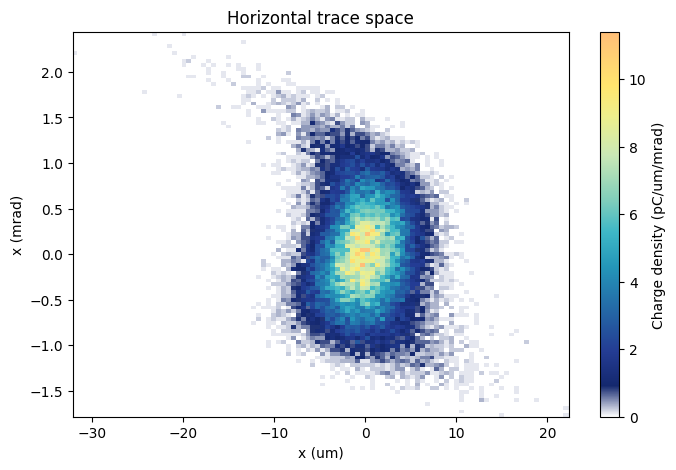

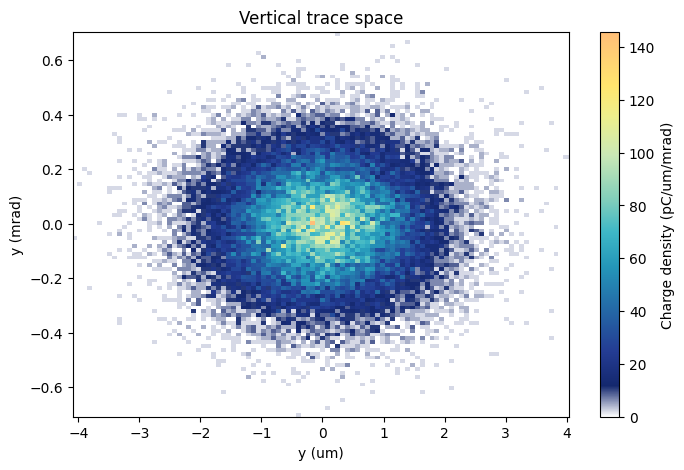

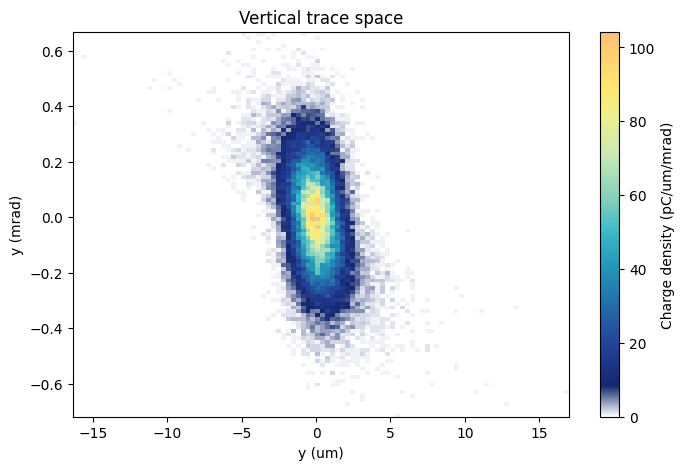

In [36]:
linac.trackables[1].plot_evolution()
linac.initial_beam.plot_trace_space_x()
linac.final_beam.plot_trace_space_x();
linac.initial_beam.plot_trace_space_y()
linac.final_beam.plot_trace_space_y();
return

## Scan the dipole field

In [ ]:
# scan the driver timing jitter
linac0 = Linac(source=source)
linac0.trackables = [source, interstage]
linac0.trackables[1].enable_nonlinearity = True
linac0.trackables[1].enable_sextupole = True
linac0.scan('scan_interstage', 
           lambda obj, val: setattr(obj.trackables[1], 'dipole_field', val) or obj, 
           np.logspace(np.log10(0.01), np.log10(5), 31),
           label='Dipole field (T)',
           scale=1,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac0.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac0.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')
linac0.plot_beam_function(Beam.bunch_length, scale=1e-6, label='Bunch length (um)', xscale='log')

## Scan the dipole length

In [ ]:
# scan the driver timing jitter
linac1 = Linac(source=source)
linac1.trackables = [source, interstage]
linac1.trackables[1].enable_nonlinearity = False
linac1.trackables[1].enable_sextupole = False
linac1.scan('scan_interstage', 
           lambda obj, val: setattr(obj.trackables[1], 'dipole_length', val) or obj, 
           np.logspace(np.log10(0.02), np.log10(5), 31),
           label='Dipole length (m)',
           scale=1,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac1.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac1.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')
linac1.plot_beam_function(Beam.bunch_length, scale=1e-6, label='Bunch length (um)', xscale='log')

## Scan the energy spread

In [ ]:
# scan the driver timing jitter
linac2 = Linac(source=source)
linac2.trackables = [source, interstage]
linac2.trackables[1].enable_nonlinearity = True
linac2.trackables[1].enable_sextupole = True
linac2.scan('scan_interstage_energy_spread', 
           lambda obj, val: setattr(obj.trackables[0], 'energy_spread', None) or setattr(obj.trackables[0], 'rel_energy_spread', val) or obj, 
           np.logspace(np.log10(1e-3), np.log10(0.1), 16),
           label='Rel. energy spread, rms (%)',
           scale=0.01,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac2.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac2.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')
linac2.plot_beam_function(Beam.bunch_length, scale=1e-6, label='Bunch length (um)', xscale='log', yscale='log')

In [ ]:
vals, valx_mean, _ = linac2.get_function_data(lambda obj: obj.final_beam.norm_emittance_x())
_, valy_mean, _ = linac2.get_function_data(lambda obj: obj.final_beam.norm_emittance_y())

E = source.energy
emitnx = source.emit_nx
emitny = source.emit_ny
beta_x = source.beta_x
beta_y = source.beta_y
L = interstage.dipole_length
B = interstage.dipole_field

fig, axs = plt.subplots(2, figsize=(6,10))
axs[0].plot(vals, valx_mean, vals, emitnx*np.sqrt(1+(vals**2*6*L/beta_x + vals**10*1e13)**2))
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].plot(vals, valy_mean, vals, emitny*np.sqrt(1+(vals**2*6*L/beta_y)**2))
axs[1].set_yscale('log')
axs[1].set_xscale('log')

## Scan the beta function

In [ ]:
# scan the driver timing jitter
linac3 = Linac(source=source)
linac3.trackables = [source, interstage]
linac3.trackables[1].enable_nonlinearity = True
linac3.trackables[1].enable_sextupole = True
linac3.scan('scan_interstage_beta_function', 
           lambda obj, val: setattr(obj.trackables[0], 'beta_x', val) or setattr(obj.trackables[0], 'beta_y', val) or obj, 
           np.logspace(np.log10(1e-4), np.log10(1), 32),
           label='Beta function (mm)',
           scale=1e-3,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=False);

In [ ]:
linac3.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac3.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')
linac3.plot_beam_function(Beam.beta_x, scale=1e-3, label='Beta function, x (mm)', xscale='log', yscale='log')
linac3.plot_beam_function(Beam.beta_y, scale=1e-3, label='Beta function, y (mm)', xscale='log', yscale='log')
linac3.plot_beam_function(Beam.alpha_x, scale=1, label='Alpha function, x', xscale='log')
linac3.plot_beam_function(Beam.alpha_y, scale=1, label='Alpha function, y', xscale='log')

## Scan the horizontal emittance

In [ ]:
# scan the driver timing jitter
linac4 = Linac(source=source)
linac4.trackables = [source, interstage]
linac4.trackables[1].enable_nonlinearity = True
linac4.trackables[1].enable_sextupole = True
linac4.scan('scan_interstage_emittance_horizontal', 
           lambda obj, val: setattr(obj.trackables[0], 'emit_nx', val) or obj, 
           np.logspace(np.log10(1e-7), np.log10(1e-3), 32),
           label='Norm emittance, x (mm mrad)',
           scale=1e-6,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac4.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac4.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')
linac4.plot_beam_function(Beam.bunch_length, scale=1e-6, label='Bunch length (um)', xscale='log', yscale='log')

In [ ]:
import matplotlib.pyplot as plt
vals, val_mean, val_std = linac4.get_function_data(lambda obj: obj.final_beam.norm_emittance_y())

E = source.energy
emitny = source.emit_ny
beta_x = source.beta_x
beta_y = source.beta_y
L = interstage.dipole_length
B = interstage.dipole_field

plt.plot(vals, val_mean, vals, emitny*np.sqrt(1+(E*vals/(8*3e8*beta_x*beta_y*B**2*L))**2))
plt.plot(np.array([1, 1])*(8*L*B**2*3e8*beta_x*beta_y/E), [1e-6, 1e-3], 'k:')
plt.yscale('log')
plt.xscale('log')

In [ ]:
import matplotlib.pyplot as plt
vals, val_mean, val_std = linac4.get_function_data(lambda obj: obj.final_beam.norm_emittance_x())

E = source.energy
emitny = source.emit_ny
beta_x = source.beta_x
beta_y = source.beta_y
L = interstage.dipole_length
B = interstage.dipole_field

plt.plot(vals, val_mean, vals, vals*np.sqrt(1+(E*vals/(16*3e8*beta_x*beta_y*B**2*L))**2))
plt.plot(np.array([1, 1])*(16*L*B**2*3e8*beta_x*beta_y/E), [1e-6, 1e-3], 'k:')
plt.yscale('log')
plt.xscale('log')

## Scan the vertical emittance

In [ ]:
# scan the driver timing jitter
linac5 = Linac(source=source)
linac5.trackables = [source, interstage]
linac5.trackables[1].enable_nonlinearity = True
linac5.trackables[1].enable_sextupole = True
linac5.scan('scan_interstage_emittance_vertical', 
           lambda obj, val: setattr(obj.trackables[0], 'emit_ny', val) or obj, 
           np.logspace(np.log10(1e-7), np.log10(1e-3), 32),
           label='Norm emittance, y (mm mrad)',
           scale=1e-6,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac5.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac5.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')

In [ ]:
import matplotlib.pyplot as plt
vals, val_mean, val_std = linac5.get_function_data(lambda obj: obj.final_beam.norm_emittance_y())

E = source.energy
emitnx = source.emit_nx
beta_x = source.beta_x
beta_y = source.beta_y
L = interstage.dipole_length
B = interstage.dipole_field

plt.plot(vals, val_mean, vals, vals*np.sqrt(1+(E*vals/(16*3e8*beta_x*beta_y*B**2*L))**2))
plt.plot(np.array([1, 1])*(16*L*B**2*3e8*beta_x*beta_y/E), [1e-6, 1e-3], 'k:')
plt.yscale('log')
plt.xscale('log')

In [ ]:
import matplotlib.pyplot as plt
vals, val_mean, val_std = linac5.get_function_data(lambda obj: obj.final_beam.norm_emittance_x())

E = source.energy
emitnx = source.emit_nx
beta_x = source.beta_x
beta_y = source.beta_y
L = interstage.dipole_length
B = interstage.dipole_field

plt.plot(vals, val_mean, vals, emitnx*np.sqrt(1+(E*vals/(8*3e8*beta_x*beta_y*B**2*L))**2))
plt.plot(np.array([1, 1])*(8*L*B**2*3e8*beta_x*beta_y/E), [1e-6, 1e-3], 'k:')
plt.yscale('log')
plt.xscale('log')

## Scan the bunch charge (CSR effects)

In [ ]:
# scan the driver timing jitter
linac6 = Linac(source=source)
linac6.trackables = [source, interstage]
linac6.trackables[1].enable_nonlinearity = True
linac6.trackables[1].enable_chicane = True
linac6.trackables[1].enable_sextupole = True
linac6.trackables[1].enable_csr = True
linac6.scan('scan_interstage_charge_csr', 
           lambda obj, val: setattr(obj.trackables[0], 'charge', val) or obj, 
           np.logspace(np.log10(1e-12), np.log10(1e-7), 32),
           label='Charge (nC)',
           scale=1e-9,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac6.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac6.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')

## Scan the bunch length (CSR effects)

In [ ]:
# scan the bunch length
linac7 = Linac(source=source)
linac7.trackables = [source, interstage]
linac7.trackables[1].enable_nonlinearity = True
linac7.trackables[1].enable_chicane = True
linac7.trackables[1].enable_sextupole = True
linac7.trackables[1].enable_csr = True
linac7.scan('scan_interstage_bunchlength_csr', 
           lambda obj, val: setattr(obj.trackables[0], 'bunch_length', val) or obj, 
           np.logspace(np.log10(1e-8), np.log10(1e-3), 32),
           label='Bunch length (um)',
           scale=1e-6,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True);

In [ ]:
linac7.plot_beam_function(Beam.norm_emittance_x, scale=1e-6, label='Emittance, x (mm mrad)', xscale='log', yscale='log')
linac7.plot_beam_function(Beam.norm_emittance_y, scale=1e-6, label='Emittance, y (mm mrad)', xscale='log', yscale='log')